In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import OrderedDict

from rewire import *

def plot_rewire_types(rdict):
    rws = np.array(rdict['rewire_counts_list'])
    rwsndx, rwtypes = zip(*[(i, rt) for i, rt in enumerate(rdict['rewire_types']) if rt[-4:]!='none'])
    plotrws = rws[:,list(rwsndx)]
    #plotrws = plotrws[600:,:]-plotrws[:-600,:]
    plt.plot(plotrws)
    plt.legend(rwtypes)
    
def conformity2(self_state, neighs_infected, neighs_noninfected, global_infected):
    return self_state + 0.00001*(1-self_state) * (neighs_noninfected-neighs_infected)

def get_conf3(alpha):
    def conformity3(self_state, neighs_infected, neighs_noninfected, global_infected):
        diff = neighs_infected - neighs_noninfected
        return self_state + alpha * float(self_state*diff - (1-self_state)*diff)
    return conformity3

def get_conf4(kappa):
    def conformity4(self_state, neighs_infected, neighs_noninfected, global_infected):
        diff = neighs_infected - neighs_noninfected
        return self_state * (neighs_infected - kappa)
    return conformity4

def get_conf9(kappa):
    def c(self_state, neighs_infected, neighs_noninfected, global_infected):
        diff = neighs_infected - neighs_noninfected
        return  self_state + kappa * (self_state * ( neighs_infected) + (1-self_state)*neighs_noninfected )
    return c

def get_conf5(kappa):
    def conformity5(self_state, neighs_infected, neighs_noninfected, global_infected):
        return self_state * ((global_infected)/100.0 - kappa)
    return conformity5

def get_conf5(kappa):
    def conformity5(self_state, neighs_infected, neighs_noninfected, global_infected):
        return self_state * (1 if ((global_infected)/100.0 > kappa) else -1)
    return conformity5

def get_conf6(kappa):
    def conformity(self_state, neighs_infected, neighs_noninfected, global_infected):
        return self_state * (kappa - neighs_noninfected) + (1-self_state)*neighs_noninfected
        #return self_state * (kappa - neighs_noninfected) + (1-self_state)*neighs_noninfected
    return conformity


def get_conf7(kappa):
    def conformity(self_state, neighs_infected, neighs_noninfected, global_infected):
        #diff = neighs_infected - neighs_noninfected
        v= self_state + (self_state*(1 if neighs_infected > kappa else -1) + (1-self_state)*(1 if neighs_noninfected > kappa else -1))
        #print self_state,neighs_infected, neighs_noninfected,v
        return v
    return conformity

def relfit(self_state, neighs_infected, neighs_noninfected, global_infected):
    v= self_state*neighs_noninfected
    return v

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
N = 1000  # number of nodes 
graph_density = 5.0 / N #  0.01
mx_init = init_graph(N, graph_density)
#print 'init  q', graphy.louvain.optimize_modularity(mx_init)[1]
is_infected_init = (np.random.random(N) < .05)
#rdicts_db = {}
#rdicts_db['ER'] = rdicts
rdict = {}
beta=100

In [ ]:
rdict2 = {}
for ndx, alpha in enumerate( (10**np.linspace(-4.01,-4,5)) ):
    rdict2[ndx] = run_rewire(mx_init, is_infected_init, benefit_function=get_conf3(alpha), 
                                       opts=dict(beta=beta, p_transmit=0.0002, NUM_ITERS=1000))
    print alpha, ndx, rdict2[ndx]['num_infected'][-1]
#del mx_init, is_infected_init
    


In [ ]:
rdict3 = {}
for ndx, kappa in enumerate( np.arange(1,5) ):
    rdict3[ndx] = run_rewire(mx_init, is_infected_init, benefit_function=get_conf4(kappa), 
                                       opts=dict(beta=beta, p_transmit=0.0002, NUM_ITERS=15000))
    print kappa, ndx, rdict3[ndx]['num_infected'][-1]


In [ ]:
rdict5 = {}
for ndx, kappa in enumerate( [10e-6, 10e-5, 10e-4] ) : # 10*np.arange(5,10,dtype='float') ):
    rdict5[ndx] = run_rewire(mx_init, is_infected_init, benefit_function=get_conf9(kappa), 
                                       opts=dict(beta=beta, p_transmit=0.0002, NUM_ITERS=2000))
    print kappa, ndx, rdict5[ndx]['num_infected'][-1]

In [ ]:
rdict6 = {}
beta = 100
def coolkids(self_state, neighs_infected, neighs_noninfected, global_infected):
    diff = neighs_infected - neighs_noninfected
    return diff

print 'meank', mx_init.sum(axis=1).mean(), is_infected_init.mean()
for ndx, kappa in enumerate( np.arange(1,5,dtype='float') ):
    rdict6[ndx] = run_rewire(mx_init, is_infected_init, benefit_function=get_conf7(kappa), 
                                       opts=dict(beta=beta, p_transmit=0.0002, NUM_ITERS=5000))
    print kappa, ndx, rdict6[ndx]['num_infected'][-1]
    #asdf


In [ ]:
def coolkids(self_state, neighs_infected, neighs_noninfected, global_infected):
    diff = neighs_infected - neighs_noninfected
    return diff

rdict0 = {}
for ndx, p in enumerate(10**np.linspace(-5,-3,10)):
    rdict0[p] = run_rewire(mx_init, is_infected_init, benefit_function=coolkids, 
                                       opts=dict(beta=beta, p_transmit=p, NUM_ITERS=5000))
    print ndx, p, rdict0[p]['num_infected'][-1]
#del mx_init, is_infected_init
    

In [ ]:
relfitd = {}
relfitd = run_rewire(mx_init, is_infected_init, benefit_function=relfit, 
                                   opts=dict(beta=beta, p_transmit=0.0002, NUM_ITERS=10000))
print relfitd['num_infected'][-1]

In [3]:
rdict=relfitd
ni=np.array(rdict['num_infected'])
plt.plot(ni)
plt.figure()
plt.imshow(rdict['mx'], cmap='Greys')
plt.figure()

plot_rewire_types(rdict)

NameError: name 'relfitd' is not defined

In [ ]:
ni=np.array(rdict['num_infected'])/float(N)
#ni=ni[0:1000] 
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(ni)
plt.ylabel('Proportion infected')
#plt.gca().set_yscale('log')
plt.xlabel('Iteration')
plt.subplot(1,3,2)
plt.plot(ni[0:5000])
plt.gca().set_yscale('log')
plt.ylabel('Proportion infected')
plt.xlabel('Iteration')

plt.subplot(1,3,3)
plt.plot(1-ni[-1000:])
plt.gca().set_yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Proportion not infected')

#plt.savefig('out/fig2.pdf', facecolor='white')


In [ ]:
inf=np.array(rdict['num_infected'],dtype='float')
s=250
#plt.subplot(2,2,ndx+1)
#plt.plot((inf[s:]-inf[:-s])/inf[s-(s/2):-(s/2)])
plt.plot((inf[s:]-inf[:-s])/inf[s:])


In [ ]:
plt.plot(rdict0[rdict0.keys()[0]]['num_infected'])


In [15]:
ptransmit = 1e-4
def coolkids_try2(self_state, neighs_infected, neighs_noninfected, global_infected):
    diff = neighs_infected - neighs_noninfected - (2.1/ptransmit)*global_infected
    return diff

rdict = run_rewire(mx_init, is_infected_init, benefit_function=coolkids_try2, 
                                   opts=dict(beta=10, p_transmit=ptransmit, NUM_ITERS=1000))
#del mx_init, is_infected_init


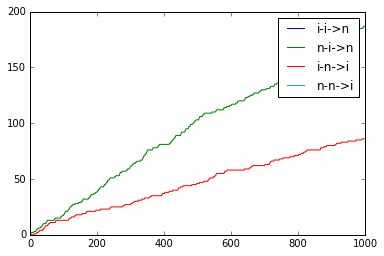

In [16]:
plot_rewire_types(rdict)